# Assignment 4: Manipulating data part 2, and "human learning"

In this assigmnent, we will continue our dive into the tasks of manipulating and cleaning data, and will try to learn from a dataset as humans.

- I will stop using the __`[ HW ]`__ notation from now on. Please read and follow all the instructions in the notebook.

## Reading, inspecting, cleaning data to prepare for learning

In [102]:
# As we did in the previous assignment, import the libraries Pandas,
# NumPy, Matplotlib, Seaborn, and run the appropriate IPython magic
# command for Matplotlib to make the plots display inside the notebook 
# (inline). 


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd 

##disable ipython autoscroll for large outputs
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

As in the previous assignment, you will find the two datasets, `income_train.csv` and `income_test.csv` in the `data` subdirectory. 

Use Pandas to read the two data files into DataFrame objects named `income_train` and `income_test`. 
Recall that the symbol `?` stands for a missing value; make sure to take that into account when
reading the data. Once you read the two datasets, display their "head"s (i.e., their first few rows). 

In [103]:
income_train = pd.read_csv('data/income_train.csv', na_values=['?'])
income_test = pd.read_csv('data/income_test.csv', na_values=['?'])

income_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [104]:
income_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


Do you notice something interesting/weird when you look at/compare the two datasets? Don't worry if not, we will explore the weirdness below, but it is always a good idea to take a look at the raw data with your naked eyes, even if just a few rows of it. If you can remind me during our next meeting, I'll tell you a relevant personal [war story](http://www.merriam-webster.com/dictionary/war%20story) involving months of confusion and a lot of money (not mine!)

In the last homework, we obtained the lists of unique values that occur in all the categorical columns of the data set `income_train`. Let's do the same thing for both of the datasets now.

- As in the last homework, define two lists, `cat_cols_train` and `cat_cols_test` that contains the list of categorical columns in the two datasets. 
- Confirm that the two lists consist of the same elements.

In [105]:
## your code here

cat_cols_train = [c for c in income_train.columns if income_train[c].dtype is np.dtype(object)]
cat_cols_test =  [c for c in income_test.columns if income_test[c].dtype is np.dtype(object)]

Next, create two dictionaries, `train_categories` and `test_categories`, where the __keys__ of the dictionary are the categorical column names, and the __values__ in the dictionary contain the unique values that occur in the corresponding category. (Read on Python dictionaries if you need to refresh your memory on keys and values)

For example, since we have

In [106]:
print income_train['sex'].unique()

['Male' 'Female']


the `'sex'` key in the `train_categories` dictionary will have the value `['Male', 'Female']`.

In [107]:
# Create dictionaries containing the unique categories for all the categorical 
# columns (one dictionary per dataset). You are free to do this in any way you want, but
# the "dictionary comprehension" technique we saw in the last homework is a quite practical
# (and idiomatic) way.

## your code here 

train_categories = {c:income_train[c].unique() for c in cat_cols_train}
test_categories = {c:income_test[c].unique() for c in cat_cols_test}

Next, let's check if the two sets of categories agree. Create a list, `disagree_cols`, that holds the names of the columns for which the lists of categories don't agree between the two datasets. Please do this programmatically, i.e., don't create these lists by manually selecting the columns after visually inspecting them (you are free to visually inspect them if you want, though). 

This should give you two columns.

Again, you are free to do this any way you want, but here is a helpful trick if you want to use it:

In [108]:
# Helpful trick: Sets as unordered lists in Python 
# Execute/modify to see/inspect behavior

a=['x','y','z']
b=['y','z','x'] # changed order
c=['x','y','y','z'] # repeated elements
d=['x','y','z','t'] # new element

print "As sets rather than lists:"
print "a==b: ", set(a) == set(b)
print "a==c: ", set(a) == set(c)
print "a==d: ", set(a) == set(d)
print "a!=d: ", set(a) != set(d)

As sets rather than lists:
a==b:  True
a==c:  True
a==d:  False
a!=d:  True


Now let's get the `disagree_cols`.

In [109]:
# Obtain the list of categorical columns where the unique cats don't agree 
# between the two datasets (you should find two!)

## Your code here

disagree_cols = [key for key in train_categories if set(train_categories[key]) != set(test_categories[key])]
print disagree_cols

#for key,value in train_categories.iteritems():
#    print key,set(train_categories[key]) == set(test_categories[key])

['yearly-income', 'native-country']


Next, print the unique values that occur in the two datasets for the two "disagree columns", together with the corresponding unique values in the two datasets. 

In [110]:
# Let me do this for you: Execute this cell after you have the needed variables below defined

for c in disagree_cols:
    print "Column: ", c
    print "train: "
    print train_categories[c]
    print "test: "
    print test_categories[c]

Column:  yearly-income
train: 
['<=50K' '>50K']
test: 
['<=50K.' '>50K.']
Column:  native-country
train: 
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines'
 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos'
 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
test: 
['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying

Different categories can sometimes naturally occur in two different datasets from the same source, but different sets of categories can signify an error, too. Looking at the outcome of the print statement above, you should see that the reason for the discrepancy in one of the columns is a clear error. Let's next fix that error.

You should have found that for one of the "disagree columns", the categories in `income_test` are almos equal to those in `income_train`, with one additional character added at the end for each category.

Create a copy of `income_test` named `income_test_corrected`, and update the relevant column in this DataFrame to make the unique categories agree with those in `income_train`; in other words, remove the extra character in the relevant column of `income_test_corrected`.

Note that there are various ways to do this in Pandas; you can use, e.g., the `map()` or the `apply()` methods.

In [111]:
# Let me create the copy for you 
income_test_corrected = income_test.copy()
# Now correct the troublesome column
income_test_corrected["yearly-income"] = income_test["yearly-income"].map({"<=50K.": "<=50K", ">50K.": ">50K"})
#income_test_corrected.head()

After correcting the trouble column in `income_test_corrected`, save this corrected version to the `data` directory using the `to_csv()` method in Pandas, but use a new file name, e.g., `income_test_corrected.csv` to avoid overwriting the existing file. Note that 

- we don't want to write index of the DataFrame object, so use an appropriate setting for the `index` parameter of `to_csv()`
- we would like to use the `?` symbol for the missing values (instead of the default symbol Pandas uses), so use the appropriate parameter and an appropriate setting for that parameter of `to_csv()`

In [112]:
income_test_corrected.to_csv("data/income_test_corrected.csv",index=False,na_rep="?")

## "Human learning"

We will soon start to learn techniques of machine learning; i.e., letting a computer program go over the data to learn to predict an outcome of interest using the data available. For the `income` datasets, we would like to learn how to  predict the `yearly-income` column using the information in the other columns. 

In this second part of the homework, I want you to use visualization and exploratory data-analysis to create a hand-made prediction function; i.e., instead of machine learning, learn from the data as a human, and write a prediction rule function. The function should take a DataFrame object with the same columns as in the two datasets income_train and income_test (except possibly the `yearly-income` column), __and returns a NumPy array (or Pandas Series object) of predictions of the `yearly-income` column__, with one prediction per row.

Once you have your predictive function, evaluate it on the test set (`income_test`) by making predictions of it `yearly-income` column, and obtaining the fraction of correct answers. 

Here are the rules:

- Show me your exploratory work. It is ok (in fact, more than ok!) to show things you tried and didn't work.
- You must not use `income_test` for your exploratory, development, and preliminary evaluation work. You can only use it once you are satisfied with your prediction function and how it performs on `income_train`, and are ready to get the final evaluation on the test set. This is the purpose of having a separate test set!

This part of the assignment is open-ended, but it will be evaluated on a "reasonable effort" basis. I don't expect you to get a highly accurate function, my aim here is to let you have this experience of trying to learn from data,  and perhaps brainstorm a bit about how a machine (algorithm) may do this automatically. I am __not__ asking you to use machine learning; please don't! Just try to learn from this dataset as a human, and write a hard-coded prediction function. Use this as an opportunity to try out different visualization and data summarization techniques. And have fun!

Just to make things concrete, I'm including one simple attempt below. Please note that this code assumes the corrected test data `income_test_corrected` has been created already.

This section will be worth 5 points.

### Example solution from Arkadaş

Get the fractions of the two categories.

In [113]:
income_train['yearly-income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: yearly-income, dtype: float64

About 75.9% have income <=50K, so if we predict everybody has income <=50K, we will have 75.9% correct answers on income_train. Let's see if we can do better.

Inspect dependence of the yearly-income on the workclass.

In [114]:
import seaborn as sns

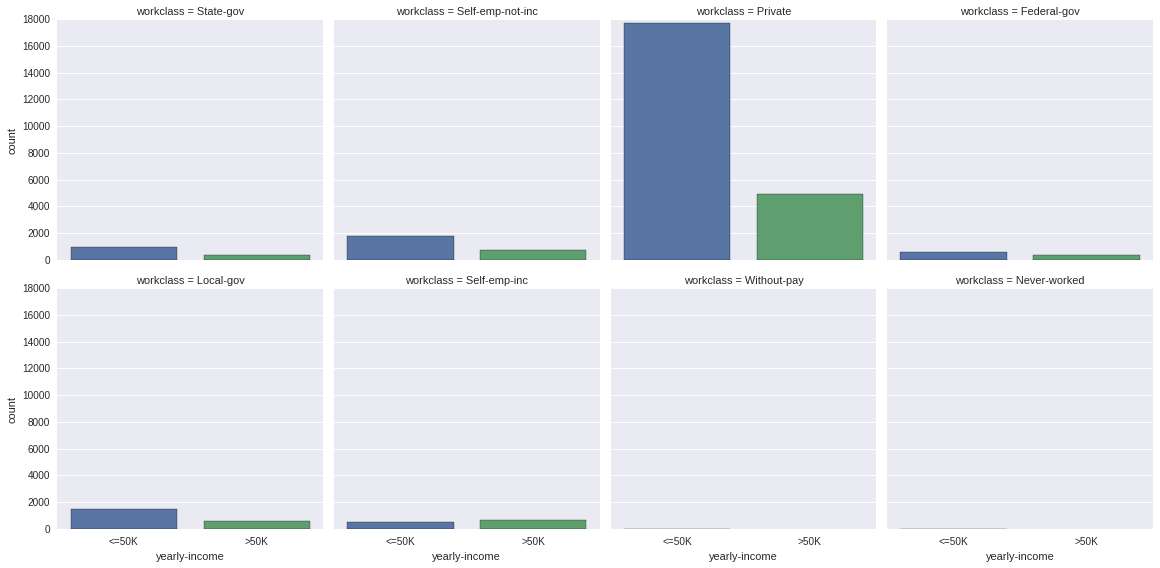

In [115]:
sns.factorplot("yearly-income", col="workclass", col_wrap=4, data=income_train, kind="count")

Looks like for workclass=Self-emp-inc, there are more people with >50K than <=50K. Let's check.

In [116]:
# Restrict to subset (read about Boolean (logical) indexing from the Pandas docs if this looks mysterious)
income_train_self_emp = income_train[ income_train['workclass']=='Self-emp-inc' ]

# Print normalized value counts
print income_train_self_emp['yearly-income'].value_counts(normalize=True)

>50K     0.557348
<=50K    0.442652
Name: yearly-income, dtype: float64


Looks like our observation was correct. So if somebody's workclass is 'Self-emp-inc', we can predict they have income >50K, and we will do better. Let's use this observation to create our prediction function.

In [117]:
# Function that takes in a data frame ('df') and returns the predicted yearly-income for each row
def predict_income(df):
    # Default prediction: everybody is <=50K
    # Repeat this default prediction as many times as there are rows in the input dataset df
    predictions = np.repeat(['<=50K'], len(df))

    # Find the rows where workclass is 'Self-emp-inc'; this creates a Boolean (logical) NumPy array
    self_emp_rows = np.array(df['workclass'] == 'Self-emp-inc')

    # Update the predictions for the corresponding rows
    # We will use logical (boolean) indexing for a NumPy array
    predictions[self_emp_rows] = '>50K'
    return predictions

Let's now predict for the training set.

In [118]:
train_predictions = predict_income(income_train)

How well did we do?

In [119]:
train_correct_predictions = np.array(train_predictions == income_train['yearly-income'])

`train_correct_predictions` is a Boolean array. True is treated as 1 and False is treated as 0, so calculating the mean gives the fraction of correct answers.

In [120]:
train_correct_predictions.mean()

0.76312152575166614

We improved on the baseline of 0.759...!

So now that we are happy with our prediction rule, let's evaluate it on the test set. But beware, there is no going back to create another prediction rule after looking at the test set; if we are unhappy about our prediction function now, we should work to improve before doing the final check on the test set. I'm happy with the 76.3% so I'm going for the final evaluation.

In [121]:
test_predictions = predict_income(income_test_corrected)

In [122]:
test_correct_predictions = np.array(test_predictions == income_test_corrected['yearly-income'])

In [123]:
test_correct_predictions.mean()

0.76702905226951656

## Your solution 

In [124]:
mean_by = income_train.groupby("yearly-income").mean()

In [125]:
mean_by.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
yearly-income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [126]:
std_by = income_train.groupby("yearly-income").std()

In [127]:
std_by.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
yearly-income,,,,,,
<=50K,14.020088,106482.271195,2.436147,963.139307,310.755769,12.318995
>50K,10.519028,102541.775472,2.385129,14570.378951,595.487574,11.012971


__it seems like increased education-num, capital-gain and hours-per-week increases yearly-income__, capital gain and capital loss are not good measures as they have high std

In [128]:
def my_predict_income(df):
    predictions = np.repeat(['<=50K'], len(df))

    high_income = np.array(df['age'] > 40)# and df['education-num'] > 10.6 and df['hours-per-week'] > 42.1)

    predictions[high_income] = '>50K'
    return predictions

In [129]:
my_train_predictions = my_predict_income(income_train)

In [130]:
my_train_correct_predictions = np.array(my_train_predictions == income_train['yearly-income'])
my_train_correct_predictions.mean()
#meeeh not good

0.63827892263751118

In [131]:
def my_predict_income(df):
    predictions = np.repeat(['<=50K'], len(df))

    high_income = np.array(df['hours-per-week'] > 40)

    predictions[high_income] = '>50K'
    return predictions

In [156]:
my_train_predictions = my_predict_income(income_train)
my_train_correct_predictions = np.array(my_train_predictions == income_train['yearly-income'])
my_train_correct_predictions.mean()
# still not ok :( 

/projects/sage/sage-7.3/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


0.75912901937901167

In [133]:
# plt.plot(income_train['yearly-income'].map({"<=50K":20, ">50K": 70}),income_train['hours-per-week'] , '.')
# tried to visualize hours per week by yearly-income to see whether if it is regressable.

In [134]:
#income_dummy_vals = income_train['yearly-income']
#income_train["yearly-income-bool"] = [51*income_train["age"][key] if income == ">50K" else 49*income_train["age"][key] for key,income in income_train["yearly-income"].iteritems()]

income_train["yearly-income-bool"] = [True if income == ">50K" else False for key,income in income_train["yearly-income"].iteritems()]

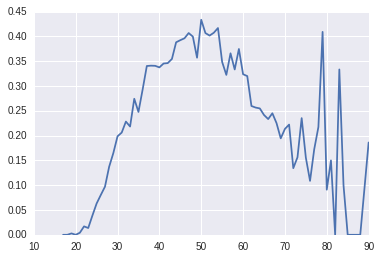

In [135]:
p_by_age = income_train[["age", "yearly-income-bool"]].groupby("age").mean() #probabilities of earning higher than >50K by age.
plt.plot(income_train[["age", "yearly-income-bool"]].groupby("age").mean())

In [136]:
p_mean = p_by_age.mean()
p_std = p_by_age.std()
print p_mean,p_std

yearly-income-bool    0.223022
dtype: float64 yearly-income-bool    0.138112
dtype: float64


In [3]:
def my_predict_income(df):
    predictions = np.repeat(['<=50K'], len(df))
    
    df["yearly-income-bool"] = income_train["yearly-income"].map({"<=50K": False, ">50K": True})
    p_by_age = df[["age", "yearly-income-bool"]].groupby("age").mean()
    p_by_age_mean = p_by_age['yearly-income-bool'].mean()
    high_income = [True if p_by_age["yearly-income-bool"][age] > p_by_age_mean else False for age in df["age"]]
    predictions[high_income] = '>50K'
    return predictions

my_train_predictions = my_predict_income(income_train)
my_train_correct_predictions = np.array(my_train_predictions == income_train['yearly-income'])
my_train_correct_predictions.mean()

NameError: name 'income_train' is not defined

__IT SEEMS REALLY NICE!__ Now try in test :)

In [155]:
my_test_predictions = my_predict_income(income_test_corrected)
my_test_correct_predictions = np.array(my_test_predictions == income_test_corrected['yearly-income'])
my_test_correct_predictions.mean()

/projects/sage/sage-7.3/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


0.76365088139549164

# 0.764
## WOW! :)